<a href="https://colab.research.google.com/github/Tanishq-Btech/ML-assignments/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = pd.read_csv('/content/balanced_dataset.csv')
dataset

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,195,331,277265,167558.0,-0.702641,1.433975,-0.804927,0.039626,0.742887,-1.236090,...,0.295893,0.706895,-0.114033,-0.036553,-0.568269,-0.819123,-0.286522,0.163264,9.99,0
1,58,5,270154,163942.0,-1.019203,0.481492,2.274583,4.241325,1.574835,1.261159,...,0.310800,0.633903,-0.249594,0.219320,0.270599,0.546483,0.083095,0.110002,0.76,0
2,311,140,203541,134862.0,-0.843108,0.992711,-0.049234,-0.452050,0.417839,-0.317310,...,0.167752,0.598356,-0.214489,0.645002,-0.094819,0.369546,0.122128,0.152635,28.19,0
3,337,458,64618,51227.0,1.226676,0.187750,-0.241095,0.899453,0.011566,-0.308025,...,-0.223437,-0.428311,-0.215693,-0.498324,0.658942,0.460571,-0.001954,0.037981,29.56,0
4,166,423,204821,135467.0,2.294081,-1.456778,-0.571003,-1.435472,-1.713102,-0.959280,...,-0.162580,0.031330,0.283906,-0.006762,-0.321962,-0.173771,0.020687,-0.048481,6.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,979,279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,980,980,280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,981,981,280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,982,982,281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
dataset.isnull().sum()

,0
Unnamed: 0.2,0
Unnamed: 0.1,0
Unnamed: 0,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0


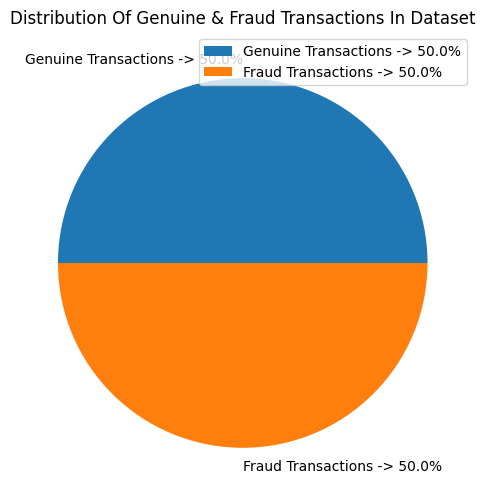

In [ ]:
plt.figure(figsize = (6,6))
dataset['Class'].value_counts()
counts = [dataset['Class'].value_counts().iloc[0],dataset['Class'].value_counts().iloc[1]]
labels = ['Genuine Transactions -> ' + str(round((counts[0]/dataset.shape[0]) * 100, 2)) + "%", 'Fraud Transactions -> '  + str(round((counts[1]/dataset.shape[0]) * 100, 2)) + "%"]
plt.pie(counts, labels=labels)
plt.legend()
plt.title('Distribution Of Genuine & Fraud Transactions In Dataset')
plt.show()

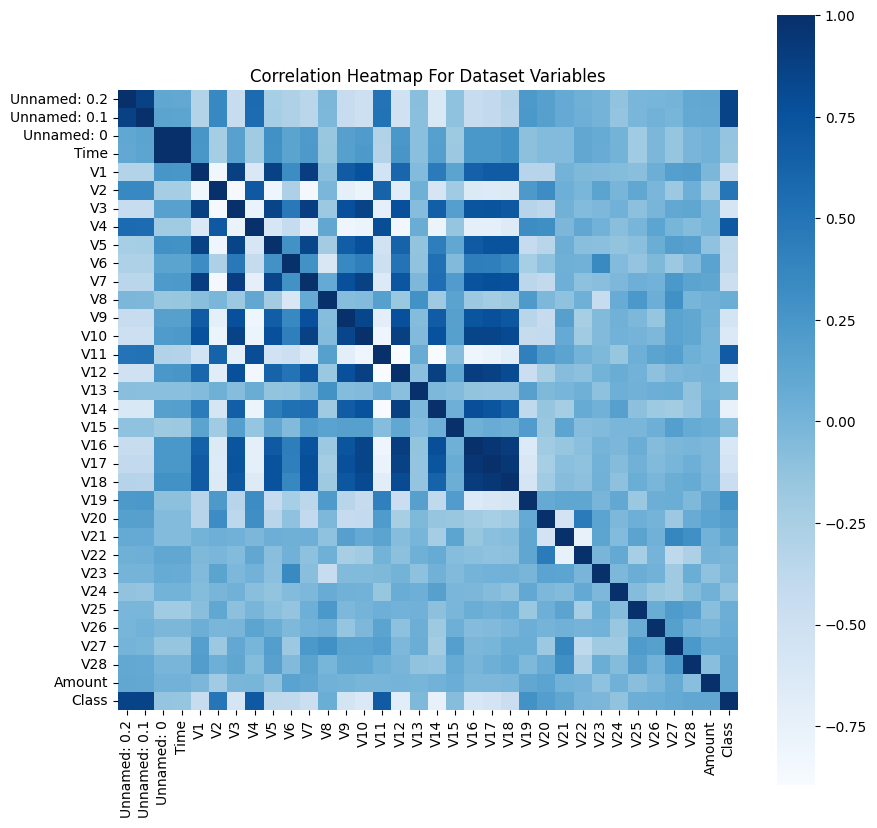

In [ ]:
# Plotting Correlation Between Different Factors Of Dataset
data_corr = dataset.corr()
fig = plt.figure(figsize = (10,10))
sns.heatmap(data_corr, square=True, cmap='Blues')
plt.title('Correlation Heatmap For Dataset Variables')
plt.show()

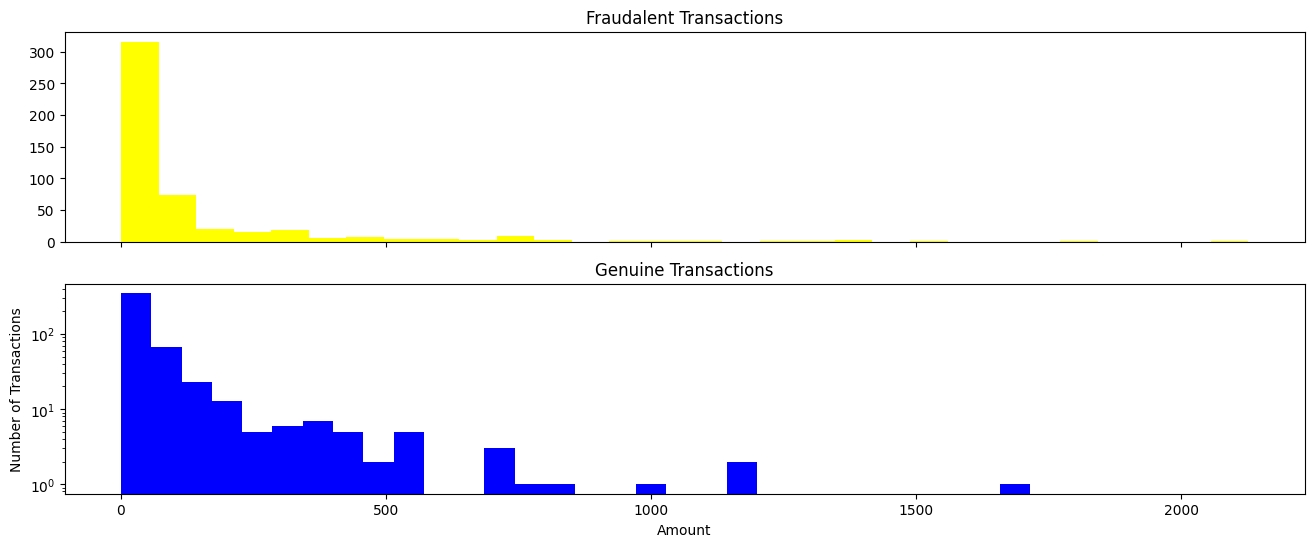

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))
ax1.hist(dataset.Amount[dataset.Class == 1], bins = 30, color='yellow')
ax1.set_title('Fraudalent Transactions')
plt.xlabel('Amount')
ax2.hist(dataset.Amount[dataset.Class == 0], bins = 30, color='blue')
ax2.set_title('Genuine Transactions')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

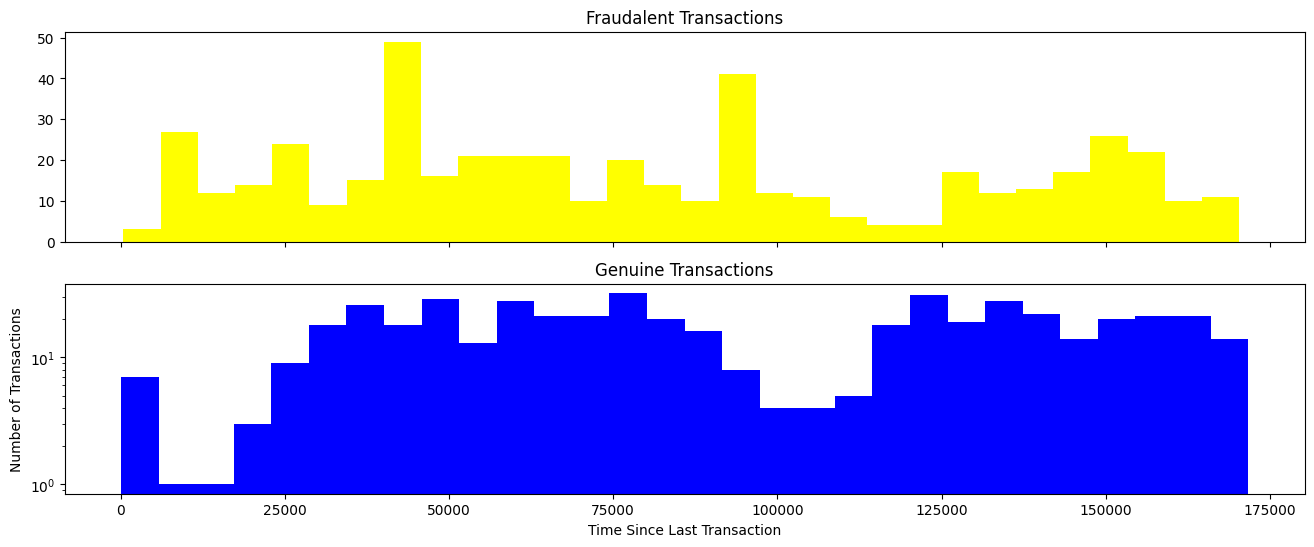

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,6))
ax1.hist(dataset.Time[dataset.Class == 1], bins = 30, color='yellow')
ax1.set_title('Fraudalent Transactions')
plt.xlabel('Time Since Last Transaction')
ax2.hist(dataset.Time[dataset.Class == 0], bins = 30, color='blue')
ax2.set_title('Genuine Transactions')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

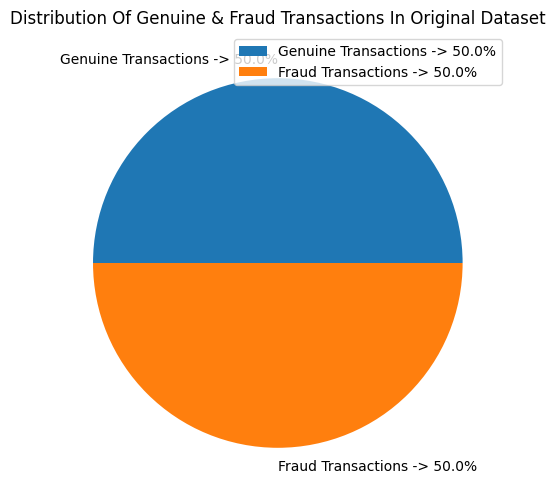

In [ ]:
plt.figure(figsize = (6,6))
counts = [dataset['Class'].value_counts().iloc[0],dataset['Class'].value_counts().iloc[1]]
labels = ['Genuine Transactions -> ' + str(round((counts[0]/dataset.shape[0]) * 100, 2)) + "%", 'Fraud Transactions -> '  + str(round((counts[1]/dataset.shape[0]) * 100, 2)) + "%"]
plt.pie(counts, labels=labels)
plt.legend(loc = 'upper right')
plt.title('Distribution Of Genuine & Fraud Transactions In Original Dataset')
plt.show()

In [ ]:
dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
# Selecting All Entries For Fraudulent Transactions
fraud_trans = dataset[dataset['Class'] == 1]

# Selecting 492 Entries Of Genuine Transactions
# Selecting These Entries Randomly using sample() method of Pandas DataFrame
gen_trans = dataset[dataset['Class'] == 0].sample(n = 492, random_state=300)

# Combining Both DataFrames To Form Balanced Dataset
dataset = pd.concat([gen_trans, fraud_trans])

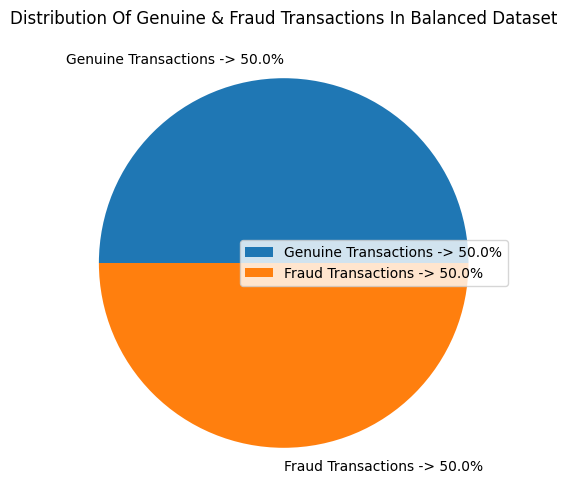

In [ ]:
plt.figure(figsize = (6,6))
counts = [dataset['Class'].value_counts().iloc[0],dataset['Class'].value_counts().iloc[1]]
labels = ['Genuine Transactions -> ' + str(round((counts[0]/dataset.shape[0]) * 100, 2)) + "%", 'Fraud Transactions -> '  + str(round((counts[1]/dataset.shape[0]) * 100, 2)) + "%"]
plt.pie(counts, labels=labels)
plt.legend(loc = 'right')
plt.title('Distribution Of Genuine & Fraud Transactions In Balanced Dataset')
plt.show()

In [ ]:
dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [ ]:
# Saving Balanced Dataset
dataset.to_csv('balanced_dataset.csv')

In [ ]:
# Dropping 'Unnamed: 0.1' column
dataset = dataset.drop('Unnamed: 0.1 , ', axis=1)

# Extracting X from the dataset
X = dataset.iloc[:,:-1]

# Extracting y from the dataset
y = dataset.iloc[:,-1]

In [95]:
X

,Unnamed: 0.2,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
195,331,95689,65423.0,1.198812,-0.969565,0.909720,-0.812698,-1.216420,0.515598,-1.339885,...,0.003541,0.488631,1.285265,-0.059285,-0.264482,0.198341,-0.006078,0.054256,0.010274,34.99
58,5,233617,147631.0,1.985193,0.048996,-1.811327,0.402782,0.551038,-0.665444,0.285573,...,-0.007549,-0.331209,-0.911578,0.274024,0.343702,-0.241839,0.179210,-0.063637,-0.022576,49.99
311,140,179385,124052.0,-0.370084,-0.053845,-0.522750,0.150395,1.200595,-1.859480,0.579931,...,0.144697,0.390013,0.871500,0.092072,-0.066405,-0.371654,-0.156979,0.090703,0.149499,59.60
337,458,20506,31089.0,0.828217,-1.862307,1.125599,-0.260777,-1.988147,0.527890,-1.298351,...,0.510340,0.341039,0.617219,-0.334546,0.065034,0.332776,-0.092772,0.020689,0.055416,251.23
166,423,131078,79495.0,-0.571380,0.874231,1.559736,-0.314766,0.780009,0.039757,1.106530,...,0.079237,0.009789,0.145812,-0.392930,-0.277021,0.396030,0.404164,-0.168988,-0.184901,16.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
980,980,280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
981,981,280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
982,982,281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [ ]:
# Splitting Dataset Into Train and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 300)

In [ ]:
# Checking Sizes Of Train & Test Splits
print('Size of X_train : ' + str(X_train.shape))
print('Size of y_train : ' + str(y_train.shape))
print('Size of X_test : ' + str(X_test.shape))
print('Size of y_test : ' + str(y_test.shape))

Size of X_train : (787, 32)
Size of y_train : (787,)
Size of X_test : (197, 32)
Size of y_test : (197,)


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
lg_classifier = LogisticRegression(solver='liblinear')
lg_classifier.fit(X_train, y_train)
lg_f1_score = np.mean(cross_val_score(lg_classifier, X_train, y_train, scoring='f1', cv=5))

In [ ]:
print('Logistic Regression F1-Score : ' + str(lg_f1_score))

Logistic Regression F1-Score : 0.9910499280871173


In [ ]:
# Saving Logistic Regression Model Using Pickle
import pickle
filename = 'LGR_Classifier.model'
with open(filename, 'wb') as file:
    pickle.dump(lg_classifier, file)

In [ ]:
print('Number of features expected by the logistic regression model: ' + str(X_train.shape[1]))

Number of features expected by the logistic regression model: 32
